<a href="https://colab.research.google.com/github/Danya05/optimization_algo/blob/main/DIANA_QSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets)[:, 0]

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

X.shape, y.shape

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

((4898, 11), (4898,))

In [ ]:
def compute_gradient(X, y, a, theta):
    # n = len(y)
    #errors =  np.full(11, 0)
    #for i in range(X.shape[0]):
    #    errors =errors + X[i]* (np.dot(X[i], theta) - y[i])
    #predictions =
    #errors = predictions - y
    #print(errors)
    #val = sum()
    #print (errors)
    #gradient = 2 * errors / X.shape[0]
    gradient1 = 2 * (X.T).dot(X.dot(theta) - y) / X.shape[0] +  2 * a * theta
    #print (gradient)
    return gradient1
    #np.linalg.norm(gradient - gradient1)

def mse(X, y, theta):
  dif = 0
  for i in range(X.shape[0]):
      dif = dif + ((np.dot(X[i], theta) - y[i])**2)[0]
  return (1/(X.shape[0])) * dif

def quantization_of_gradient(gradient, dec=1):
    return np.round(gradient, decimals=dec)


def gradient_descent(X, y, a, learning_rate=0.001, num_iterations=1000, m = 1): #
    data = []
    theta = np.zeros(X.shape[1])  # Инициализация параметров единичными значениями
    for _ in range(num_iterations):
        gradient = compute_gradient(X, y, a, theta)
        #gradient = compute_gradient(X, y, theta)
        #data.append(mse(X, y, theta))
        data.append(np.linalg.norm(compute_gradient(X, y, a, theta)))
        #print(gradient)
        theta = (theta - learning_rate * gradient)
        #print(theta)
    return data

In [ ]:
data = []
#gradient_descent(X.drop_duplicates(subset=X.columns).to_numpy(), y.iloc[X.drop_duplicates(subset=X.columns).index].to_numpy())

In [ ]:
compute_gradient(X, y, 1, np.zeros(X.shape[1]))

array([-8.04137811e+01, -3.23619437e+00, -3.92672111e+00, -7.42598612e+01,
       -5.29968967e-01, -4.15321151e+02, -1.61339200e+03, -1.16839789e+01,
       -3.75072724e+01, -5.76939976e+00, -1.24553076e+02])

In [ ]:
full_data = []
x = []
#for i in range(1, 11):
#  full_data.append(gradient_descent(X, y, learning_rate = 0.002*i))
#  x.append(0.001*i)
#print()
a = 100
full_data.append(gradient_descent(X, y, a, 1 / (2 * np.max(np.linalg.eigvals(X.T.dot(X)) / X.shape[0]) + 2 * a)))

In [ ]:
np.max(np.linalg.eigvals(X.T.dot(X))) / X.shape[0]

22513.298490313122

In [ ]:
new_data = []
for i in full_data:
  new_data.append(i[:])

In [ ]:
pd_data = pd.DataFrame(np.array(full_data).T, columns=[f"learning_rate = {0.002 * i}" for i in range(1, 11)])
new_pd_data = pd.DataFrame(np.array(new_data).T, columns=[f"learning_rate = {0.002 * i}" for i in range(1, 11)]).drop(columns=[f"learning_rate = {0.02}"])

ValueError: ignored

<Axes: >

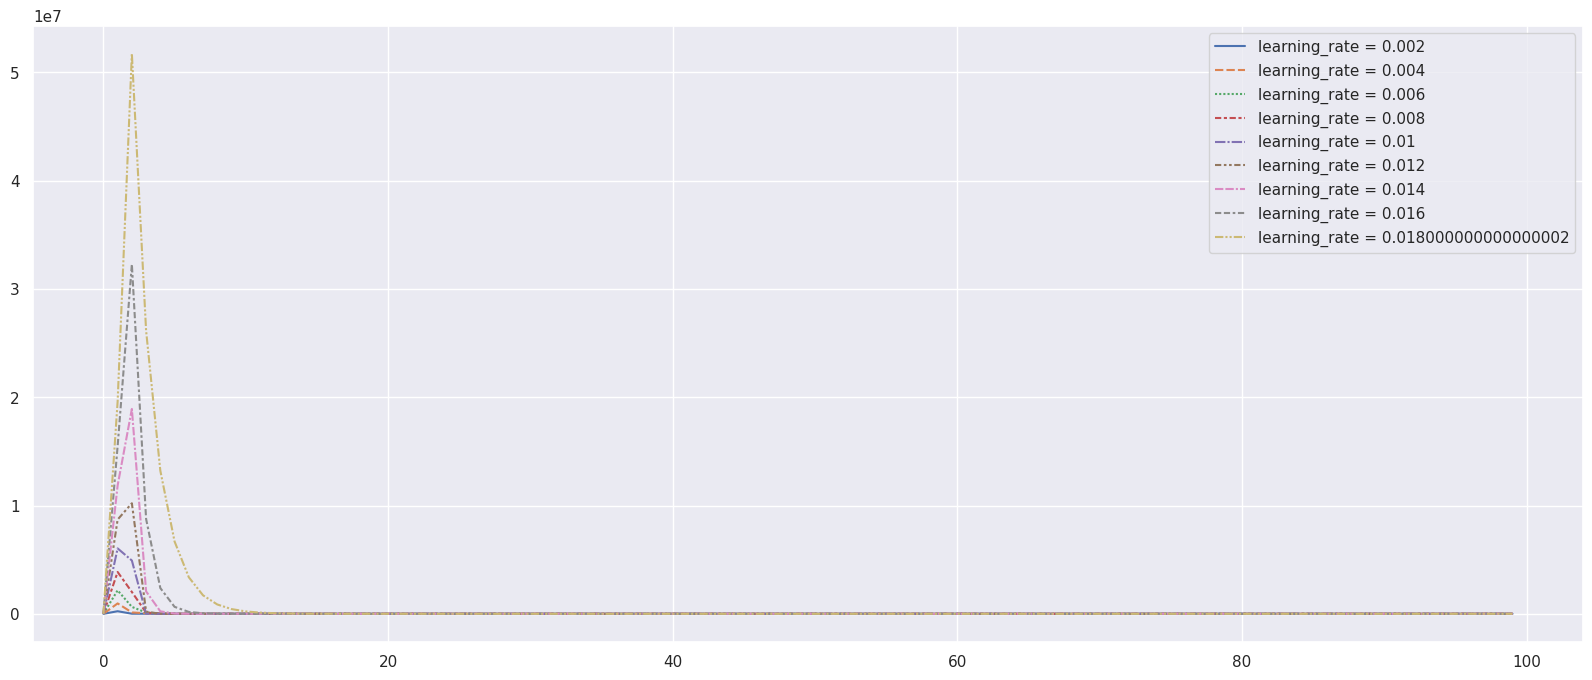

In [ ]:
#sns.lineplot(data=pd_data)
#fig, axs = plt.subplots(nrows=2)
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.set_theme()
sns.lineplot(data=new_pd_data)
#sns.lineplot(data=new_pd_data[[f"learning_rate = {0.002 * i}" for i in range(5, 8)]], ax=axs[1])

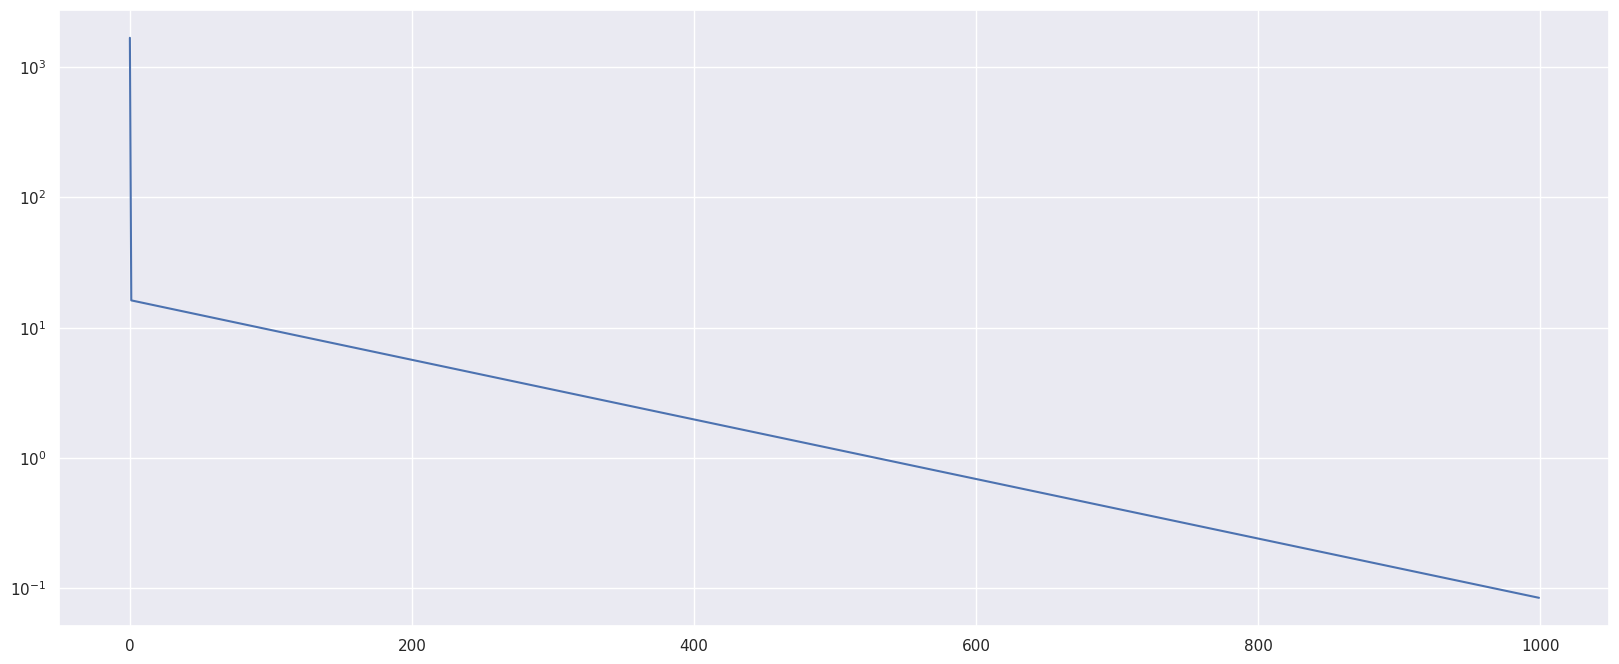

In [ ]:
plt.semilogy(full_data[0])

In [ ]:
new_pd_data

,learning_rate = 0.002,learning_rate = 0.004,learning_rate = 0.006,learning_rate = 0.008,learning_rate = 0.01,learning_rate = 0.012,learning_rate = 0.014,learning_rate = 0.016,learning_rate = 0.018000000000000002
0,35.072204,35.072204,3.507220e+01,3.507220e+01,3.507220e+01,3.507220e+01,3.507220e+01,3.507220e+01,3.507220e+01
1,237240.786639,959782.709363,2.167661e+06,3.860875e+06,6.039426e+06,8.703312e+06,1.185254e+07,1.548709e+07,1.960699e+07
2,8565.818459,127589.857961,6.396065e+05,2.017015e+06,4.922087e+06,1.020706e+07,1.891403e+07,3.227499e+07,5.171167e+07
3,5619.000404,49011.648456,1.180796e+05,1.157487e+05,1.203290e+04,2.019795e+05,2.069508e+06,8.757182e+06,2.614175e+07
4,3686.155186,18827.747425,2.180054e+04,6.644091e+03,3.089652e+01,3.997802e+03,2.264439e+05,2.376093e+06,1.321541e+07
...,...,...,...,...,...,...,...,...,...
95,1.496882,1.496882,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.497042e+00
96,1.496882,1.496882,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.497007e+00
97,1.496882,1.496882,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.497042e+00
98,1.496882,1.496882,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.496882e+00,1.497007e+00


In [ ]:
from concurrent.futures import ThreadPoolExecutor


In [ ]:
def worker(X, y, a, theta, grad, h, delta, alpha, num_of_workers):
  for i in range(num_of_workers):
    grad[i] = compute_gradient(X, y, a, theta)
    delta[i] = grad[i] - h[i]
    delta[i] = delta[i]
    #grad[i] = h[i] + delta[i]
    h[i] = h[i] + alpha * delta[i]

def diana(X, y, a, num_of_workers=10, learning_rate=0.001, num_iterations=1000, m = 1, alpha = 1): #
    theta = np.zeros(X.shape[1])  # Инициализация параметров единичными значениями
    deltas_parts_from_workers = np.zeros( (np.int64(num_of_workers), X.shape[1] ))
    grad = np.full((num_of_workers, X.shape[1]), 0)
    h = np.zeros((num_of_workers, X.shape[1]))
    h1 = sum(h) / num_of_workers
    print(h1)
    data1 = []
    data2 = []
    for _ in range(num_iterations):

        worker(X, y, a, theta, grad, h, deltas_parts_from_workers, alpha, num_of_workers)

        delta = (sum(deltas_parts_from_workers) / len(deltas_parts_from_workers))
        gradient = h1 + delta

        data1.append(np.linalg.norm(compute_gradient(X, y, a, theta) - gradient))
        data2.append(np.linalg.norm(gradient))
        theta = (theta - learning_rate * gradient)
        h1 = h1 + alpha * delta

    return data1

In [ ]:
diana_data = []
for i in range(1, 2):
  diana_data.append(diana(X, y, 100, 1, 1 / (2 * np.max(np.linalg.eigvals(X.T.dot(X)) / X.shape[0]) + 2 * 100)))
  #print(diana_data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


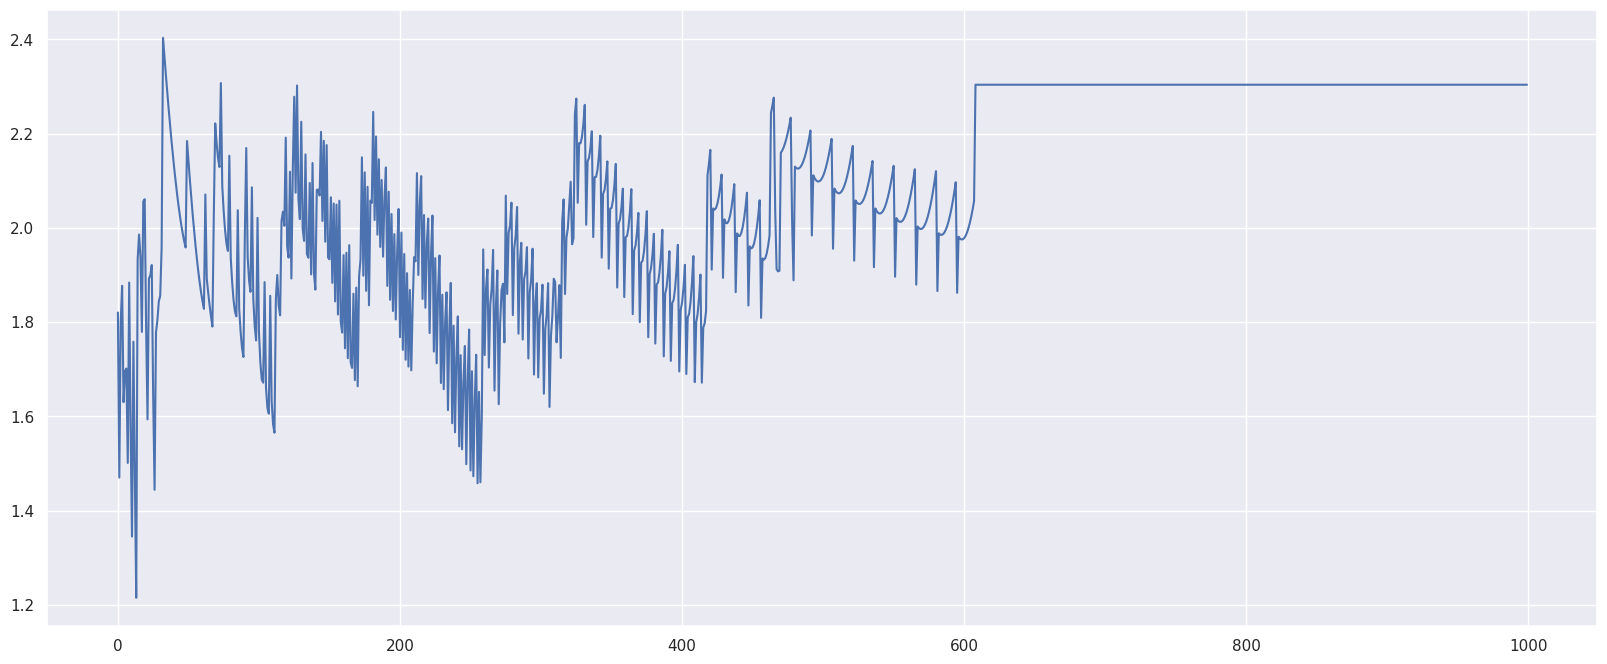

In [ ]:
plt.plot(diana_data[0])

In [ ]:
new__diana_data = []
for i in diana_data:
  new__diana_data.append(i[:])

In [ ]:
pd_diana_data = pd.DataFrame(np.array(full_data).T, columns=[f"learning_rate = {0.002 * i}" for i in range(1, 11)])
new_pd_diana_data = pd.DataFrame(np.array(new__diana_data).T, columns=[f"learning_rate = {0.002 * i}" for i in range(1, 11)]).drop(columns=[f"learning_rate = {0.02}"])

In [ ]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.set_theme()
sns.lioneplot(data=new_pd_diana_data)
#sns.lineplot(data=new_pd_data[[f"learning_rate = {0.002 * i}" for i in range(5, 8)]], ax=axs[1])

AttributeError: ignored

In [ ]:
new_diana_cut_data = []
for i in diana_data:
  new_diana_cut_data.append(i[30:])
new_pd_diana_cut_data = pd.DataFrame(np.array(new_diana_cut_data).T, columns=[f"learning_rate = {0.002 * i}" for i in range(1, 11)]).drop(columns=[f"learning_rate = {0.02}"])

<Axes: >

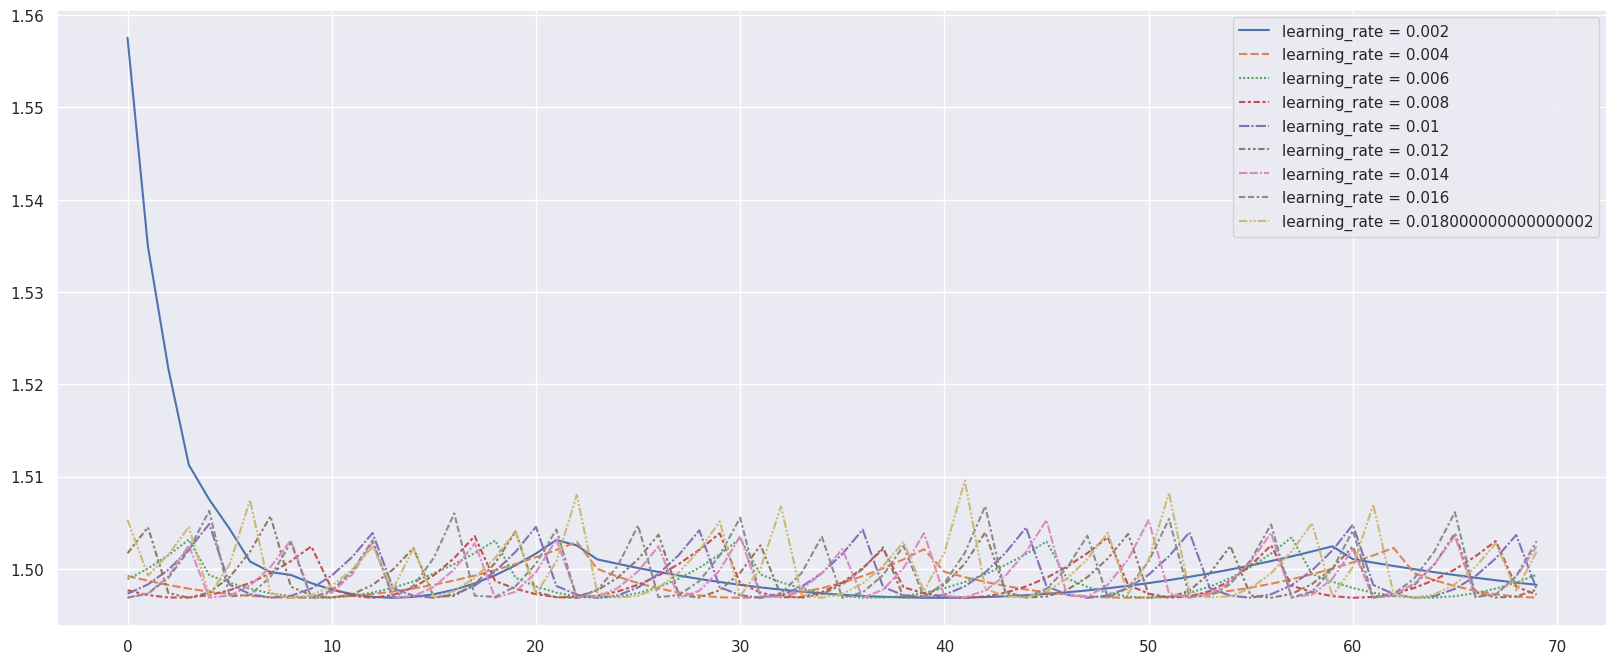

In [ ]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.set_theme()
sns.lineplot(data=new_pd_diana_cut_data)

In [ ]:
diana_data_with_less_lr = []
for i in range(1, 11):
  diana_data_with_less_lr.append(diana(X.drop_duplicates(subset=X.columns).to_numpy(), y.iloc[X.drop_duplicates(subset=X.columns).index].to_numpy(), learning_rate = 0.0002*i))
  #print(diana_data)

In [ ]:
new__diana_data_with_less_lr = []
for i in diana_data_with_less_lr:
  new__diana_data_with_less_lr.append(i[30:])

In [ ]:
pd_diana_data_with_less_lr = pd.DataFrame(np.array(full_data).T, columns=[f"learning_rate = {0.0002 * i}" for i in range(1, 11)])
new_pd_diana_data_with_less_lr = pd.DataFrame(np.array(new__diana_data_with_less_lr).T, columns=[f"learning_rate = {0.0002 * i}" for i in range(1, 11)]).drop(columns=[f"learning_rate = {0.002}"])

In [ ]:
new_pd_diana_data_with_less_lr_ln = np.log2(new_pd_diana_data_with_less_lr)

In [ ]:
new_pd_diana_data_with_less_lr_ln

,learning_rate = 0.0002,learning_rate = 0.0004,learning_rate = 0.0006000000000000001,learning_rate = 0.0008,learning_rate = 0.001,learning_rate = 0.0012000000000000001,learning_rate = 0.0014,learning_rate = 0.0016,learning_rate = 0.0018000000000000002
0,3.980310,3.413378,2.997055,2.557767,2.066751,1.584311,1.173555,0.895523,0.728298
1,3.929676,3.319087,2.858352,2.394589,1.891049,1.426125,1.045326,0.809341,0.686087
2,3.879220,3.224574,2.722715,2.237797,1.728055,1.279692,0.944697,0.754250,0.653510
3,3.828968,3.131161,2.590861,2.085655,1.575664,1.155985,0.860827,0.705606,0.631830
4,3.778945,3.039051,2.463536,1.942484,1.439550,1.055080,0.796815,0.670200,0.613889
...,...,...,...,...,...,...,...,...,...
65,1.415555,0.636926,0.584353,0.583106,0.585503,0.583047,0.581954,0.581951,0.584389
66,1.391812,0.632497,0.584056,0.583417,0.585324,0.582916,0.581949,0.581959,0.584710
67,1.368935,0.628245,0.583778,0.583766,0.585149,0.582794,0.581956,0.581975,0.585051
68,1.345327,0.624171,0.583520,0.584151,0.584979,0.582680,0.581976,0.581998,0.585412


<Axes: >

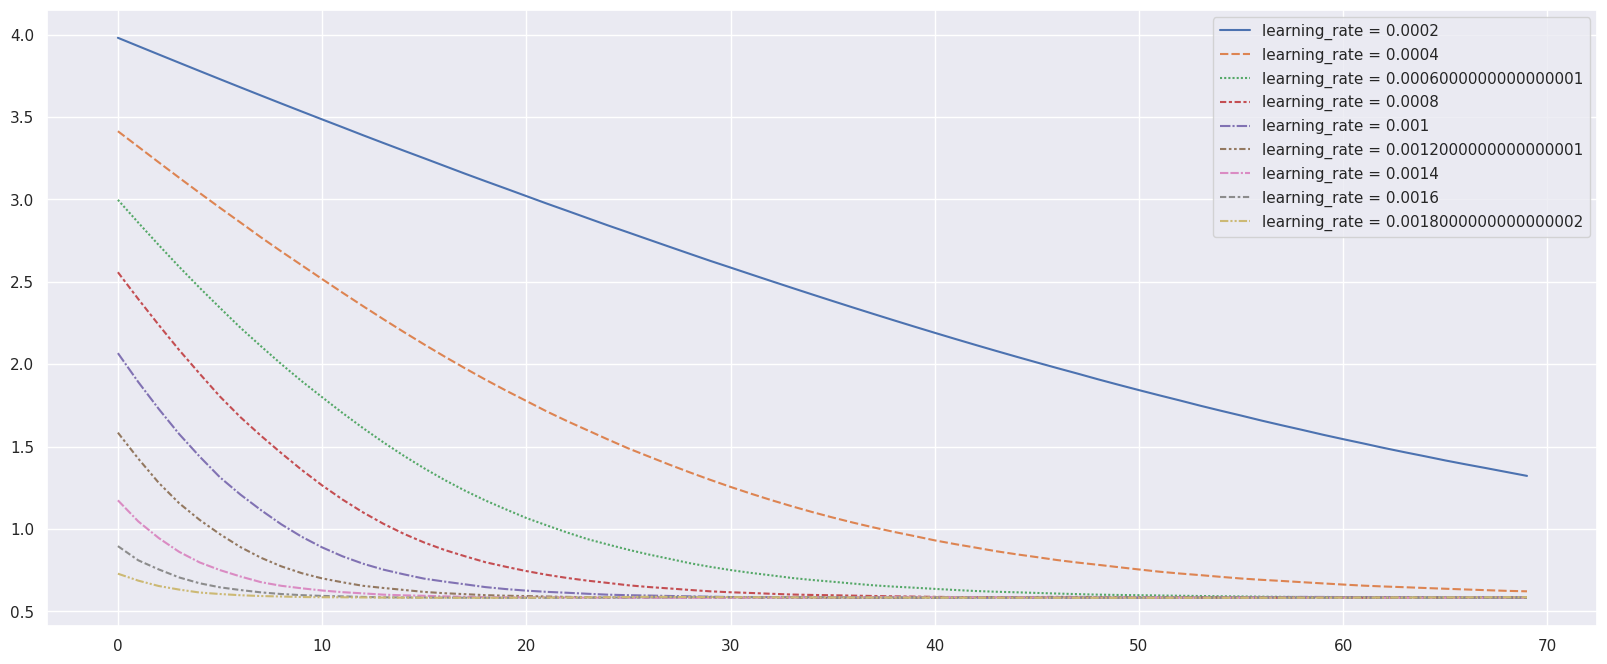

In [ ]:
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.set_theme()
sns.lineplot(data=new_pd_diana_data_with_less_lr_ln)